#  Telco Customer Churn Dataset – Explanation

**Dataset Name:** Telco Customer Churn
**Rows:** 7,043 customers
**Columns:** 21 features
**Target Variable:** `Churn`

---

##  Business Goal

* **Classification:** Predict whether a customer will **leave (Churn = Yes)** or **stay (No)**
* **Regression (optional):** Predict **MonthlyCharges / TotalCharges**

---

##  Column-by-Column Explanation

### 🔹 Customer Information

| Column          | Meaning                     |
| --------------- | --------------------------- |
| `customerID`    | Unique ID of each customer  |
| `gender`        | Male / Female               |
| `SeniorCitizen` | 1 = Senior citizen, 0 = Not |
| `Partner`       | Has partner or not          |
| `Dependents`    | Has dependents or not       |

---

### 🔹 Service Information

| Column             | Meaning                          |
| ------------------ | -------------------------------- |
| `tenure`           | Number of months customer stayed |
| `PhoneService`     | Has phone service or not         |
| `MultipleLines`    | Multiple phone lines or not      |
| `InternetService`  | DSL / Fiber optic / None         |
| `OnlineSecurity`   | Online security service          |
| `OnlineBackup`     | Online backup                    |
| `DeviceProtection` | Device protection                |
| `TechSupport`      | Tech support                     |
| `StreamingTV`      | Streaming TV service             |
| `StreamingMovies`  | Streaming movies service         |

---

### 🔹 Contract & Billing

| Column             | Meaning                              |
| ------------------ | ------------------------------------ |
| `Contract`         | Month-to-month / One year / Two year |
| `PaperlessBilling` | Yes / No                             |
| `PaymentMethod`    | Credit card, Bank transfer, etc.     |

---

### 🔹 Charges (Important for Regression)

| Column           | Meaning                          |
| ---------------- | -------------------------------- |
| `MonthlyCharges` | Monthly bill amount              |
| `TotalCharges`   | Total amount charged to customer |

---

### 🔹  Target Variable

| Column  | Meaning                                             |
| ------- | --------------------------------------------------- |
| `Churn` | **Yes → customer left**<br>**No → customer stayed** |

---

##  How This Dataset Is Used in ML

### 🔹 Classification

* Input: Customer details, services, billing info
* Output: **Churn (Yes/No)**
* Algorithms: Logistic Regression, Random Forest, XGBoost
* Metric: ROC-AUC, F1-score

---

### 🔹 Regression

* Input: Customer behavior + contract
* Output: **MonthlyCharges / TotalCharges**
* Algorithms: Linear Regression, Gradient Boosting
* Metric: RMSE, R²

---


## Step 1: Data Cleaning


In [1]:
# Handle missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset
df = dataset.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
## cheaking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
## there is no null values 

In [7]:
df.duplicated().sum() ## there is no duplicate value in the dataset

np.int64(0)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
## time to endcode the dataset
df.drop("customerID" , axis=1 , inplace=True)
df.head() # custommer id  is not important so drop it

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
## seprating the  dataset have numerical colum and have categorical comlumns
categorical_feature  = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_feature  = [feature for feature in df.columns if df[feature].dtype != 'O']

In [12]:
categorical_feature , numeric_feature,len(categorical_feature)

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges',
  'Churn'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 17)

## we can do one thing drop totalcharge 
## Clculate useing tpotal charge = monthelycharge * tenure

In [13]:
df.drop("TotalCharges" , axis=1,inplace=True)

In [16]:
for i in categorical_feature:
    print(df[i].value_counts())
    print("=" *60)

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

In [19]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype('int')

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


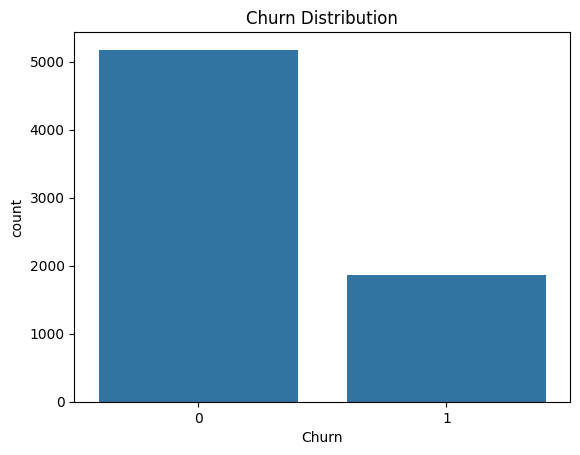

In [41]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


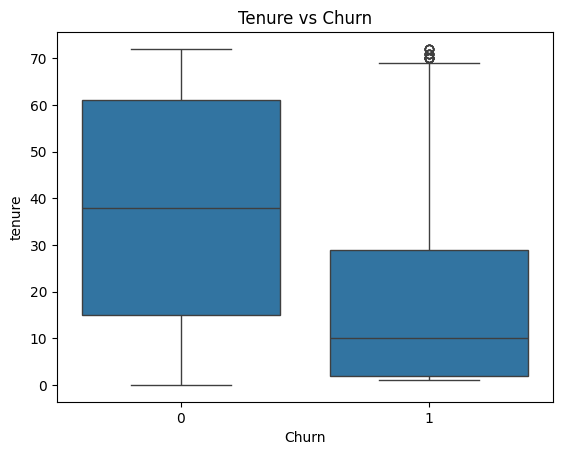

In [42]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


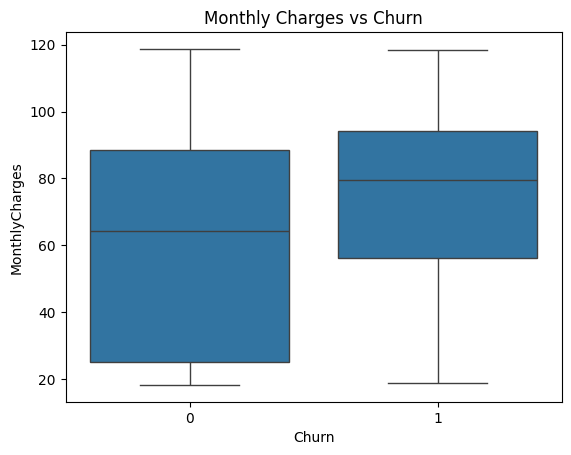

In [43]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


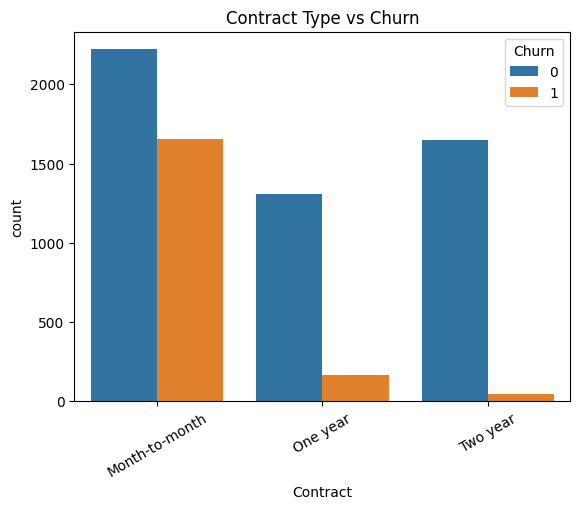

In [44]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.xticks(rotation=30)
plt.title("Contract Type vs Churn")
plt.show()


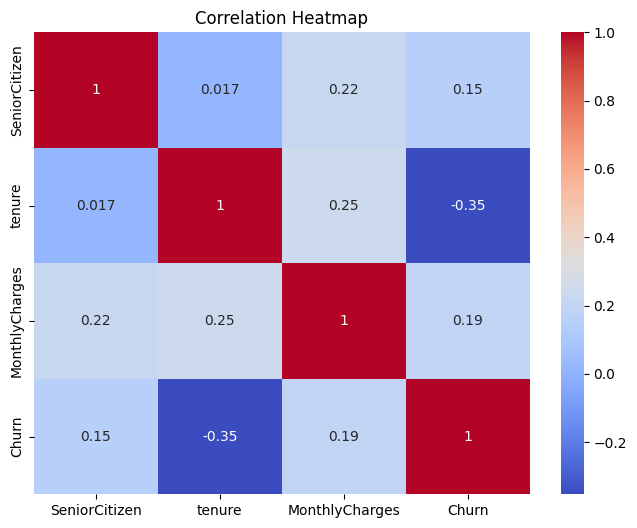

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [46]:
services = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df["total_services"] = df[services].apply(
    lambda x: sum(x == "Yes"), axis=1
)


In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,total_services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,0


In [48]:
df.to_csv('clean_data.csv')